#### Steps:
>Training:
1. Initialize weights and biases to 0
2. Predict linear prediction and then convert them into probabilities
3. Calculate error
4. Gradient descent to get new weights and bias
5. Repeat epochs times

#### Gradient descent formula for logloss

>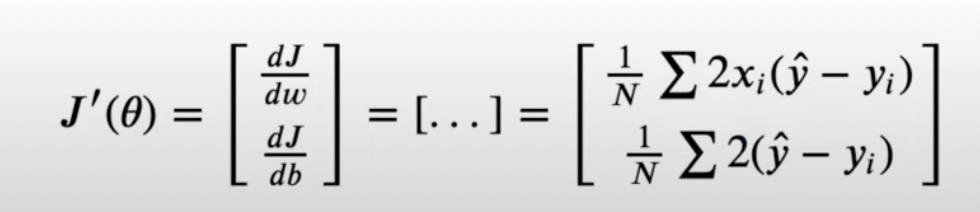

In [2]:
import numpy as np

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [4]:
class LogisticRegression():
    def __init__(self, lr=0.002, epochs=1000):
        self.lr=lr
        self.epochs=epochs
        self.weights=None
        self.bias=None
    
    def fit(self, X,y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            linear_prediction = np.dot(X,self.weights) + self.bias # y=mx + c
            predictions = sigmoid(linear_prediction)

            dw = (1/n_samples) * np.dot(X.T,predictions-y)
            db = (1/n_samples) * np.sum(predictions-y)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db
    
    def predict(self, X):
        linear_prediction = np.dot(X,self.weights) + self.bias
        prediction = sigmoid(linear_prediction)

        class_pred = [ 0 if x<=0.5 else 1 for x in prediction]

        return class_pred

        

## Testing with a dataset

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [6]:
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [7]:
clf = LogisticRegression(lr=0.01)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

/var/folders/mr/_5z88nsx3jzgcnght0vscfv40000gp/T/ipykernel_13702/4033946986.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


In [8]:
def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_test)/len(y_test)

acc = accuracy(y_pred, y_test)
print(acc)

0.9210526315789473


## Rough Work

In [13]:
X.shape

(569, 30)

In [21]:
weights = np.zeros(X.shape[1])

In [24]:
np.dot(X,weights).shape

(569,)